In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

from api_keys import weather_api_key

from citipy import citipy


In [2]:
lat_lngs = []

cities = []

lat_range = (-90, 90)
lng_range = (-180, 180)

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)

print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 590


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

city_data = []

print("Beginning Data Retrieval     ")
print("-----------------------------")

record_count = 1
set_count = 1

for i, city in enumerate(cities):
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + "metric"
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count += 1

    try:
        city_weather = requests.get(city_url)
        city_weather = city_weather.json()
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
                          

    except:
        print("City not found. Skipping...")
        pass
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aykhal
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | bandarbeyla
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | hailar
Processing Record 7 of Set 1 | poronaysk
Processing Record 8 of Set 1 | bardai
Processing Record 9 of Set 1 | sola
Processing Record 10 of Set 1 | bilibino
Processing Record 11 of Set 1 | constantia
Processing Record 12 of Set 1 | khandyga
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | vetluzhskiy
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | porto novo
Processing Record 17 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 18 of Set 1 | newman
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | talnakh
Processing Record 22 of S

In [4]:
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [5]:
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [6]:
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aykhal,66.0000,111.5000,-27.98,100,100,1.57,RU,1707354849
1,port elizabeth,-33.9180,25.5701,19.62,81,5,3.13,ZA,1707354849
2,college,64.8569,-147.8028,-12.18,74,75,0.00,US,1707354850
3,bandarbeyla,9.4942,50.8122,25.14,68,74,7.20,SO,1707354850
4,adamstown,-25.0660,-130.1015,25.00,81,100,6.82,PN,1707354850


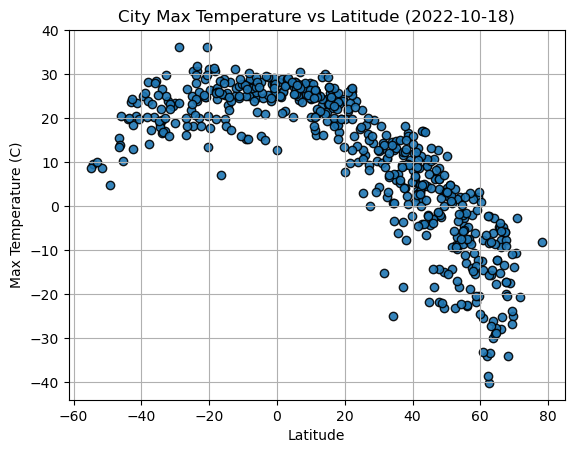

In [7]:
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidth=1, marker="o", alpha=.9)

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Temperature vs Latitude (2022-10-18)")
plt.grid()

plt.savefig("output_data/Fig1.png")

plt.show()


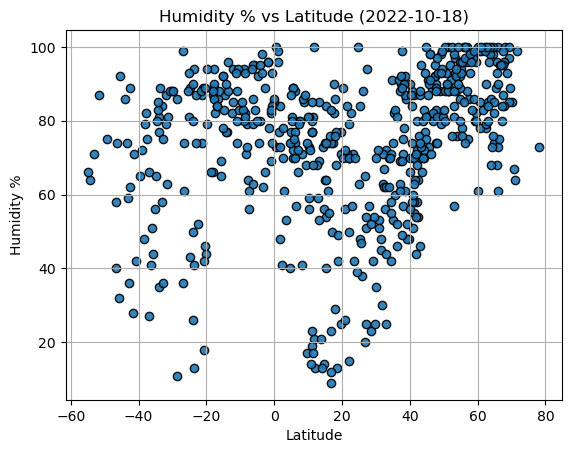

In [8]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidth=1, marker="o", alpha=.9)

plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title("Humidity % vs Latitude (2022-10-18)")
plt.grid()

plt.savefig("output_data/Fig2.png")

plt.show()

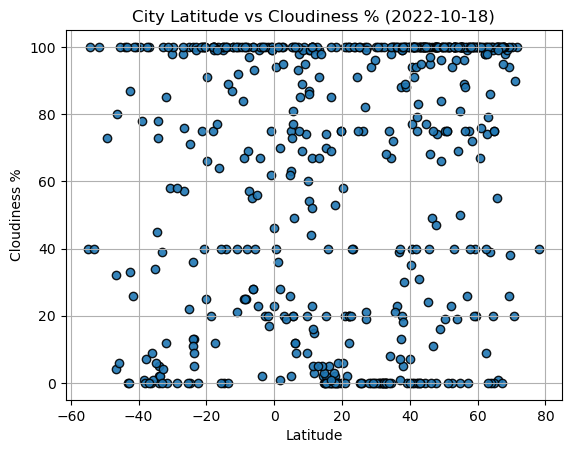

In [9]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidth=1, marker="o", alpha=.9)

plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs Cloudiness % (2022-10-18)")
plt.grid()

plt.savefig("output_data/Fig3.png")

plt.show()

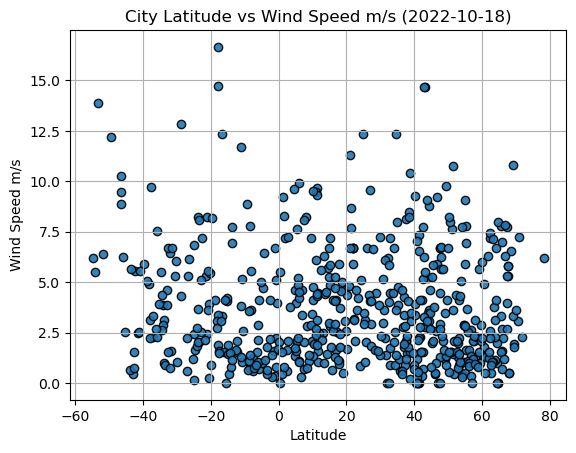

In [10]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidth=1, marker="o", alpha=.9)

plt.xlabel("Latitude")
plt.ylabel("Wind Speed m/s")
plt.title("City Latitude vs Wind Speed m/s (2022-10-18)")
plt.grid()

plt.savefig("output_data/Fig4.png")

plt.show()

In [11]:
northern_hem_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

northern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aykhal,66.0000,111.5000,-27.98,100,100,1.57,RU,1707354849
2,college,64.8569,-147.8028,-12.18,74,75,0.00,US,1707354850
3,bandarbeyla,9.4942,50.8122,25.14,68,74,7.20,SO,1707354850
5,hailar,49.2000,119.7000,-23.24,98,66,3.49,CN,1707354850
6,poronaysk,49.2167,143.1167,-14.91,79,96,1.19,RU,1707354851


In [12]:
southern_hem_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

southern_hem_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port elizabeth,-33.9180,25.5701,19.62,81,5,3.13,ZA,1707354849
4,adamstown,-25.0660,-130.1015,25.00,81,100,6.82,PN,1707354850
8,sola,-13.8833,167.5500,28.34,77,100,6.93,VU,1707354851
12,edinburgh of the seven seas,-37.0676,-12.3116,17.26,66,100,2.27,SH,1707354852
14,avarua,-21.2078,-159.7750,29.03,74,75,8.23,CK,1707354852


In [58]:
def linear_regression_plot(x_values, y_values, coord_eq, x_title, y_title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, coord_eq, fontsize=15, color="red")
    plt.xlabel(x_title)
    plt.ylabel(y_title)
    correlation = round(st.pearsonr(x_values,y_values)[0],2)
    print(f"The r-value is: {correlation}")
    plt.show()


The r-value is: -0.87


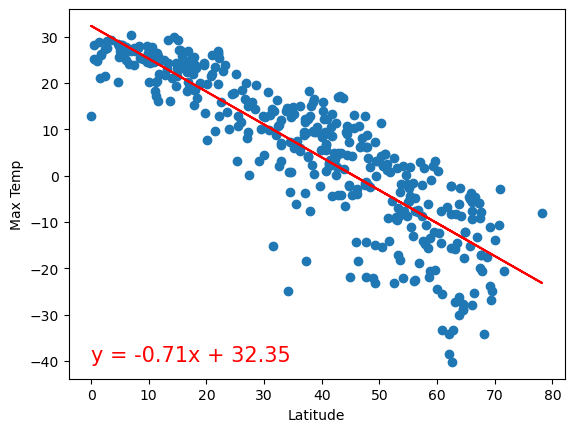

This linear regression is modeling the relationship between latitude and maximum temperature in the Northern Hemisphere
We can observe that as latitude increases, temperature decreases.


In [59]:
linear_regression_plot(northern_hem_df["Lat"], northern_hem_df["Max Temp"], (0,-40), "Latitude", "Max Temp")
print("This linear regression is modeling the relationship between latitude and maximum temperature in the Northern Hemisphere")
print("We can observe that as latitude increases, temperature decreases.")

The r-value is: 0.49


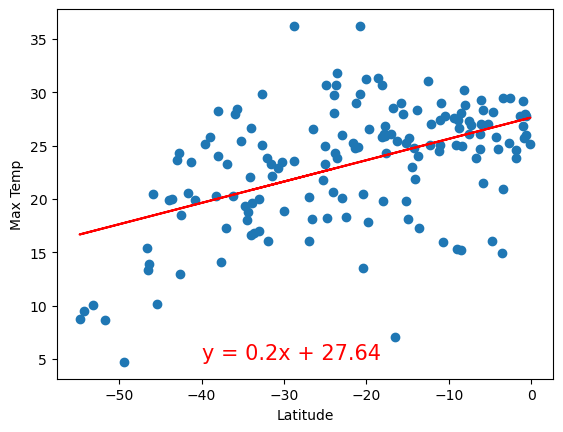

This linear regression is modeling the relationship between latitude and maximum temperature in the Southern Hemisphere
We can observe that as latitude increases, maximum temperature increases as well.


In [60]:
linear_regression_plot(southern_hem_df["Lat"], southern_hem_df["Max Temp"], (-40,5), "Latitude", "Max Temp")
print("This linear regression is modeling the relationship between latitude and maximum temperature in the Southern Hemisphere")
print("We can observe that as latitude increases, maximum temperature increases as well.")

The r-value is: 0.46


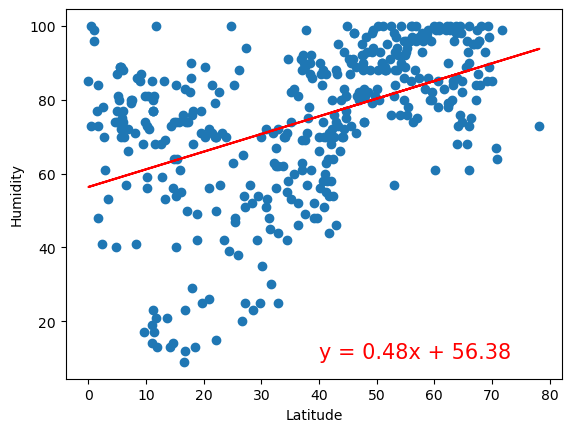

This linear regression is modeling the relationship between latitude and humidity in the Northern Hemisphere
We can observe that as latitude increases, humnidity increases.


In [61]:
linear_regression_plot(northern_hem_df["Lat"], northern_hem_df["Humidity"], (40,10), "Latitude", "Humidity")
print("This linear regression is modeling the relationship between latitude and humidity in the Northern Hemisphere")
print("We can observe that as latitude increases, humnidity increases.")

The r-value is: 0.37


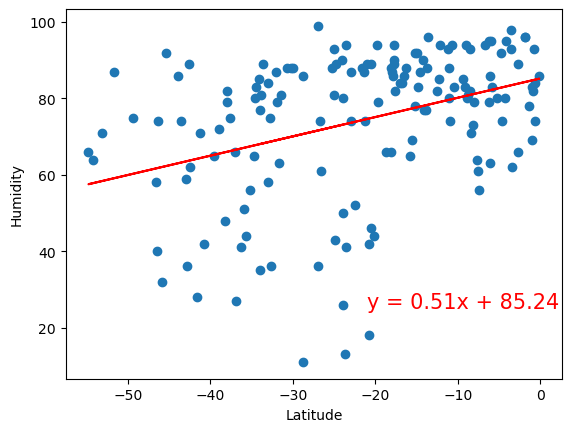

This linear regression is modeling the relationship between latitude and humidity temperature in the Southern Hemisphere
We can observe that as latitude increases, humidity also increases similarly to the Northern Hemishphere.


In [62]:
linear_regression_plot(southern_hem_df["Lat"], southern_hem_df["Humidity"], (-21,25), "Latitude", "Humidity")
print("This linear regression is modeling the relationship between latitude and humidity temperature in the Southern Hemisphere")
print("We can observe that as latitude increases, humidity also increases similarly to the Northern Hemishphere.")

The r-value is: 0.27


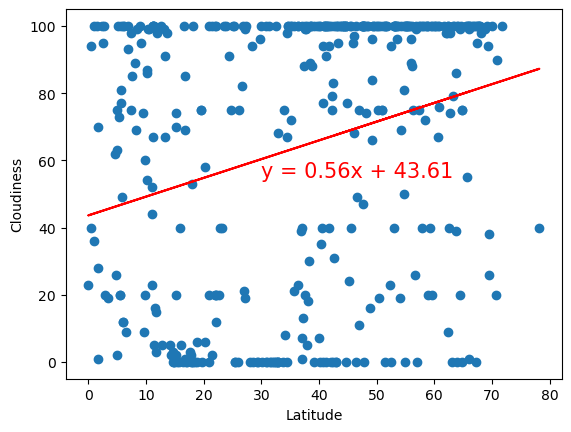

This linear regression is modeling the relationship between latitude and cloudiness in the Northern Hemisphere
We can observe that as latitude increases, cloudiness also increases.


In [63]:
linear_regression_plot(northern_hem_df["Lat"], northern_hem_df["Cloudiness"], (30,55), "Latitude", "Cloudiness")
print("This linear regression is modeling the relationship between latitude and cloudiness in the Northern Hemisphere")
print("We can observe that as latitude increases, cloudiness also increases.")

The r-value is: 0.22


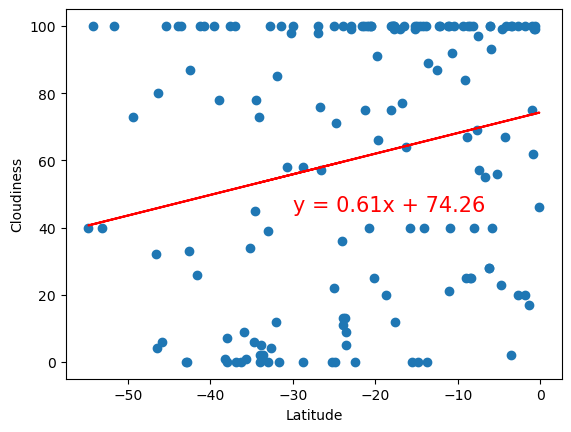

This linear regression is modeling the relationship between latitude and maximum temperature in the Southern Hemisphere
We can observe that as latitude increases, cloudiness increases.


In [64]:
linear_regression_plot(southern_hem_df["Lat"], southern_hem_df["Cloudiness"], (-30,45), "Latitude", "Cloudiness")
print("This linear regression is modeling the relationship between latitude and maximum temperature in the Southern Hemisphere")
print("We can observe that as latitude increases, cloudiness increases.")

The r-value is: -0.09


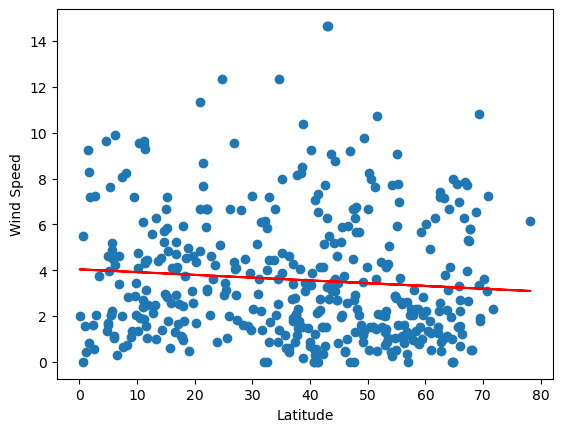

This linear regression is modeling the relationship between latitude and Wind Speed in the Northern Hemisphere
We can observe that as latitude increases, wind spead steadily decreases.


In [65]:
linear_regression_plot(northern_hem_df["Lat"], northern_hem_df["Wind Speed"], (0,-14), "Latitude", "Wind Speed")
print("This linear regression is modeling the relationship between latitude and Wind Speed in the Northern Hemisphere")
print("We can observe that as latitude increases, wind spead steadily decreases.")

The r-value is: -0.29


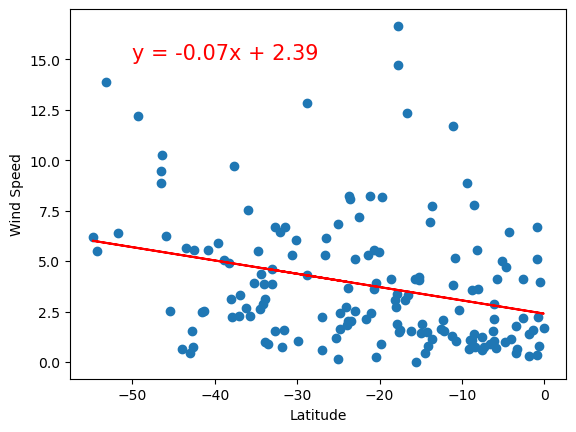

This linear regression is modeling the relationship between latitude and wind speed in the Northern Hemisphere
We can observe that as latitude increases, wind speed decreases. However, it seems to do so in a more aggressive manner than in the Northern Hemisphere.


In [66]:
linear_regression_plot(southern_hem_df["Lat"], southern_hem_df["Wind Speed"], (-50,15), "Latitude", "Wind Speed")
print("This linear regression is modeling the relationship between latitude and wind speed in the Northern Hemisphere")
print("We can observe that as latitude increases, wind speed decreases. However, it seems to do so in a more aggressive manner than in the Northern Hemisphere.")